Saving data.csv to data (15).csv
Category     0
Deviation    0
SampleID     0
dtype: int64


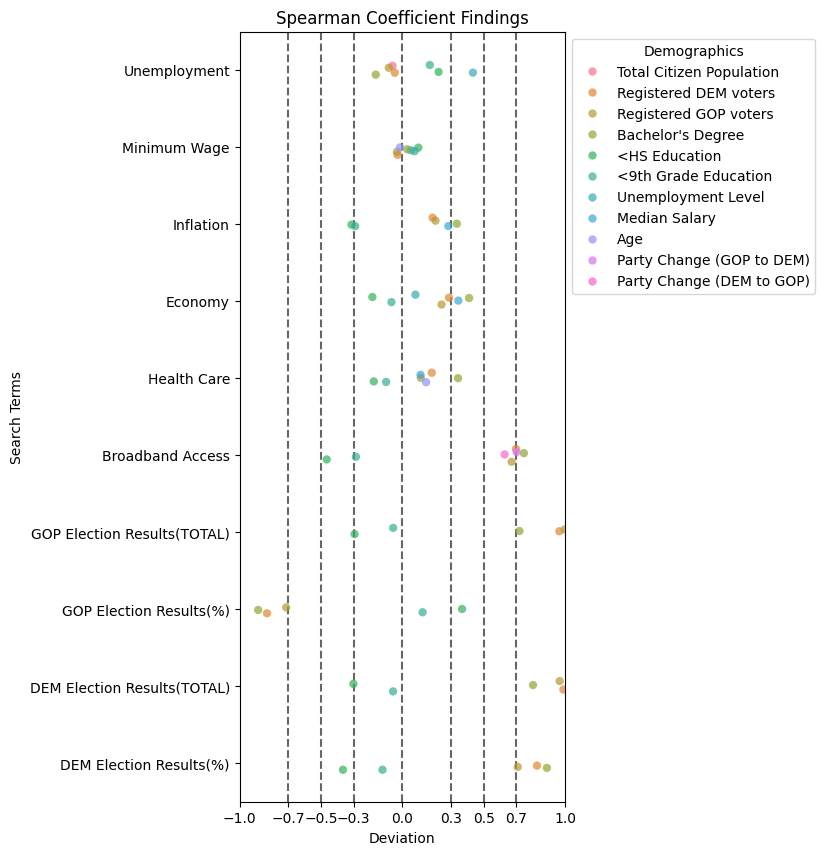

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Load data from CSV
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# Ensure Deviation is numeric
df['Deviation'] = pd.to_numeric(df['Deviation'], errors='coerce')

# Check for NaN values (optional)
print(df.isna().sum())  # See if any values are missing

# Sort categories by mean deviation for better ordering
category_order = df['Category'].drop_duplicates().tolist()

# Set the figure size
plt.figure(figsize=(4.2, 10))

# Create a scatter plot with colors based on Category
sns.stripplot(
    data=df,
    y='Category',
    x='Deviation',
    hue='SampleID',  # Color by Category instead of SampleID
    jitter=True,
    size=6,
    alpha=0.7,
    palette='husl',  # You can change the color palette
    order = category_order
)

# Add a vertical reference line at 0
plt.axvline(0, color='black', linestyle='--', alpha=0.6)
plt.axvline(0.3, color='black', linestyle='--', alpha=0.6)
plt.axvline(0.5, color='black', linestyle='--', alpha=0.6)
plt.axvline(0.7, color='black', linestyle='--', alpha=0.6)
plt.axvline(-0.3, color='black', linestyle='--', alpha=0.6)
plt.axvline(-0.5, color='black', linestyle='--', alpha=0.6)
plt.axvline(-0.7, color='black', linestyle='--', alpha=0.6)

# Set x-axis limits from -1 to 1
plt.xlim(-1, 1)
plt.xticks(ticks=[-1, -0.7, -0.5, -0.3, 0, 0.3, 0.5, 0.7, 1])  # Custom tick positions

# Label axes
plt.title("Spearman Coefficient Findings")
plt.xlabel("Deviation")
plt.ylabel("Search Terms")

# Adjust legend (optional: remove legend since it's redundant)
plt.legend(title="Demographics", bbox_to_anchor=(1, 1), loc='upper left')


# Show the plot
plt.show()
